# Closed SEIR Model

Importing libraries: [numpy](https://numpy.org/), [scipy](https://www.scipy.org/), [matplotlib](https://matplotlib.org/)

In [1]:
import aux
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Model's equations:

$\lambda(t) = \frac{\beta_i}{N} * I(t)$

$\dot{S(t)} = -\lambda * S(t)$

$\dot{E(t)} = \lambda * S(t) - f * E(t)$

$\dot{I(t)} = f * E(t) - r * I(t)$

$\dot{R(t)} = r * I(t)$

With variables:

* $S$: Susceptibles
* $E$: Exposed
* $I$: Infective
* $R$: Recovered
* $N$: Total population
* $f$: Rate of progression from latent to infectious 
* $\beta$: Infectious people contact rate
* $r$: Recovery rate

Converted into code:

In [2]:
def dSEIR(y, t, N, beta, f, r):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - f * E
    dIdt = f * E - r * I
    dRdt = r * I
    return dSdt, dEdt, dIdt, dRdt

Defining initial parameters for the model and simulation:
* **N**: Total population
* **tmax**: Simulated time (days)
* **eInit, iInit, rInit**: Initial exposed, infected and recovered populations
* **R0**: Basic reproductive number
* **lP**: Latent period
* **iP**: Infectious period

In [3]:
(N, tmax) = (1000, 365)
(R0, lP, iP) = (3.25, 8, 7)
(iInit, eInit, rInit) = (1, 0, 0)

Calculating internal variables and running the system:

In [4]:
(f, r) = (1/lP, 1/iP)
sInit = N - (eInit + iInit + rInit)
beta = R0 * r
y0 = (sInit, iInit, eInit, rInit)
t = np.linspace(0, tmax, tmax)
ret = odeint(dSEIR, y0, t, args=(N, beta, f, r))
S, E, I, R = ret.T

Plotting

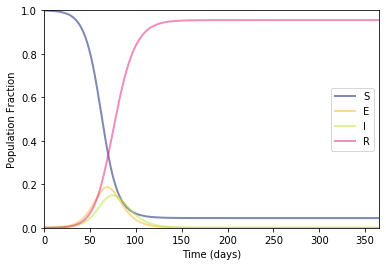

In [5]:
# Defining triplets: (series, color, label)
triplets = (
    (S, '#02146b', 'S'), (E, '#ffb428', 'E'), 
    (I, '#b4e830', 'I'), (R, '#e21e7b', 'R')
)
# Plotting
(fig, ax) = aux.plotEpiDynamics(triplets, t, N)